<a href="https://colab.research.google.com/github/khaiyuanyap/Transport-Connectivity-For-Students-In-Singapore/blob/main/Preliminary_Secondary_Data_Analysis_On_Public_Transport_Connectivity_For_Students_(Geography_WA4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preliminary Seconday Data Analysis On Public Transport Connectivity For Students

## Sources
School Directory and Information: General information of schools

Ministry Of Education (MOE) @ data.gov.sg
https://beta.data.gov.sg/collections/457/datasets/d_688b934f82c1059ed0a6993d2a829089/view

Last updated: March 25, 2021

Date created: May 29, 2017

Licence: [Singapore Open Data Licence](https://beta.data.gov.sg/open-data-license)

© 2024 Open Government Products, Government Technology Agency of Singapore

---



# Code Documentation:

## Objective:

The provided code snippet retrieves data about schools in Singapore from a government API, processes it, and generates a bar chart illustrating the concentration of schools in different DGP (District Group Planning) zones.

## Data Retrieval:

1. API Request:
   - The code sends a GET request to the Singapore government's data portal API (`https://data.gov.sg/api/action/datastore_search`) with specific query parameters.
   - The query specifies the desired fields, sorting, and limit.
2. Response Processing:
   - The JSON response from the API is parsed, and the relevant data is extracted into a Pandas DataFrame (`df`).

## Data Processing:

1. Grouping and Aggregation:
   - The DataFrame is grouped by the `dgp_code` column to count the number of schools in each School DGP Zone (`df_grouped`).
   - A new row is added to the DataFrame with the total number of schools.
2. Calculating Averages:
   - Separate lists are created for the average number of MRT stations and bus services associated with each School DGP Zone (`dgps`, `mrt_average`, and `bus_average`).
3. Creating a Processed DataFrame:
   - A new DataFrame (`df_processed`) is created with the DGP codes, average MRT stations, and average bus services.
   - The `Total Schools` column is formatted with commas for readability.

## Visualization:

1. Bar Chart Generation:
   - The `df_filtered` DataFrame (excluding the 'Total' row) is used to extract DGP codes and total schools.
   - A bar chart is created with DGP codes on the x-axis and total schools on the y-axis.
   - Labels and a title are added to the chart.
2. Chart Display:
   - The bar chart is displayed using `plt.show()`.

## Additional Notes:

- The code truncates the average MRT and bus service values to the nearest integer.
- The figure size for the bar chart is adjusted to accommodate the number of bars.

In [ ]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from itertools import groupby
from google.colab import data_table

In [ ]:
data_table.enable_dataframe_formatter()

In [ ]:
url = "https://data.gov.sg/api/action/datastore_search"

querystring = {"resource_id":"d_688b934f82c1059ed0a6993d2a829089", "fields":"school_name, mainlevel_code, postal_code, zone_code, dgp_code, mrt_desc, bus_desc","sort":"zone_code, dgp_code","limit":"1000"}

response = requests.get(url, params=querystring)

school_data = response.json()['result']["records"]

In [ ]:
df = pd.DataFrame(school_data, columns=["school_name", "zone_code", "dgp_code", "mrt_desc", "bus_desc"])
df

,school_name,zone_code,dgp_code,mrt_desc,bus_desc
0,ANGLICAN HIGH SCHOOL,EAST,BEDOK,TANAH MERAH MRT,"2, 9, 12, 14, 24, 31, 35, 38, 45, 47, 48"
1,BEDOK GREEN PRIMARY SCHOOL,EAST,BEDOK,"Bedok MRT Station, Tanah Merah MRT Station","Bus No. 2, 9, 12, 24, 31, 34 & 38"
2,BEDOK GREEN SECONDARY SCHOOL,EAST,BEDOK,"BEDOK MRT, BEDOK RESERVOIR MRT","14, 17, 18, 28, 46, 66, 67, 69, 168, 222, 228,..."
3,BEDOK SOUTH SECONDARY SCHOOL,EAST,BEDOK,TANAH MERAH MRT,"10, 14, 45"
4,BEDOK VIEW SECONDARY SCHOOL,EAST,BEDOK,TANAH MERAH MRT,"2, 9, 12, 14, 24, 25, 31, 35, 38, 45, 46, 47, ..."
...,...,...,...,...,...
332,XINGNAN PRIMARY SCHOOL,WEST,JURONG WEST,Pioneer MRT Station,Bus 99 & 241
333,YUAN CHING SECONDARY SCHOOL,WEST,JURONG WEST,LAKESIDE MRT,"98, 154, 154A, 180, 182, 187, 240, 240A, 246"
334,YUHUA SECONDARY SCHOOL,WEST,JURONG WEST,LAKESIDE MRT,"49, 98, 99, 157, 180, 185, 187, 198, 334, 335,..."
335,ANGLO-CHINESE JUNIOR COLLEGE,WEST,QUEENSTOWN,Buona Vista,"74,95,100,105,106,111,145,147,191,196,198,602"


In [ ]:
df_grouped = df.groupby('dgp_code').size().reset_index(name='Total Schools')

# Calculate the total number of schools
total_schools = df['school_name'].count()

# Add a row with the total number of schools
df_grouped.loc[len(df_grouped)] = ['Total', total_schools]

# Display the DataFrame
df_grouped


,dgp_code,Total Schools
0,ANG MO KIO,14
1,BEDOK,22
2,BISHAN,9
3,BUKIT BATOK,13
4,BUKIT MERAH,11
5,BUKIT PANJANG,12
6,BUKIT TIMAH,11
7,CENTRAL,6
8,CHOA CHU KANG,14
9,CLEMENTI,9


In [ ]:
# Group schools by DGP code
school_data.sort(key=lambda x: x['dgp_code'])
grouped_data = {dgp: list(group) for dgp, group in groupby(school_data, key=lambda x: x['dgp_code'])}

In [ ]:
# Group schools by DGP code
school_data.sort(key=lambda x: x['dgp_code'])
grouped_data = {dgp: list(group) for dgp, group in groupby(school_data, key=lambda x: x['dgp_code'])}

# Initialize and reinitialize lists to store data
dgps = []
mrt_average = []
bus_average = []

# Loop through each School DGP Zone
for dgp, schools in grouped_data.items():
    total_schools = len(schools)
    total_mrt_stations = sum(len(school['mrt_desc'].split(', ')) for school in schools if school['mrt_desc'])
    total_bus_services = sum(len(school['bus_desc'].split(', ')) for school in schools if school['bus_desc'])

    avg_mrt_stations = total_mrt_stations / total_schools
    avg_bus_services = total_bus_services / total_schools

    dgps.append(dgp)
    mrt_average.append(avg_mrt_stations)
    bus_average.append(avg_bus_services)

1. Loop Through Each School DGP Zone:
   The algorithm iterates through each School DGP Zone in the `grouped_data` dictionary, where each DGP code is associated with a list of schools.

2. Calculate Total Schools, MRT Stations, and Bus Services
   For each School DGP Zone:
   - It calculates the total number of schools (`total_schools`) in that zone.
   - It calculates the total number of MRT stations (`total_mrt_stations`) by summing up the count of MRT stations for each school in the zone. This count is obtained by splitting the `mrt_desc` string of each school by the comma-space delimiter and counting the resulting elements. If the `mrt_desc` is empty or `None`, it contributes zero to the total count.
   - It calculates the total number of bus services (`total_bus_services`) in a similar manner by splitting the `bus_desc` string of each school and counting the resulting elements.

3. Calculate Averages:
   After obtaining the totals, the algorithm computes the average number of MRT stations and bus services per school in that School DGP Zone:
   - The average number of MRT stations (`avg_mrt_stations`) is calculated by dividing the `total_mrt_stations` by the `total_schools`.
   - Similarly, the average number of bus services (`avg_bus_services`) is calculated by dividing the `total_bus_services` by the `total_schools`.

4. Store Averages:
   Finally, the algorithm appends the DGP code (`dgp`), average MRT stations (`avg_mrt_stations`), and average bus services (`avg_bus_services`) to their respective lists (`dgps`, `mrt_average`, `bus_average`) for later plotting.

In [ ]:
# Create a Pandas DataFrame with the processed data
df_processed = pd.DataFrame({
    "DGP Code": dgps,
    "Average MRT Stations": [int(x) for x in mrt_average],
    "Average Bus Services": [int(x) for x in bus_average]
})

# Display the DataFrame with a note
print("Processed Data (Truncated to Integer):\n")
print("Note: Values in 'Average MRT Stations' and 'Average Bus Services' columns are truncated to the nearest integer.")

df_processed['Total Schools'] = df_grouped['Total Schools'].astype(int).apply(lambda x: f'{x}')

df_processed

Processed Data (Truncated to Integer):

Note: Values in 'Average MRT Stations' and 'Average Bus Services' columns are truncated to the nearest integer.


,DGP Code,Average MRT Stations,Average Bus Services,Total Schools
0,ANG MO KIO,1,7,14
1,BEDOK,1,8,22
2,BISHAN,1,6,9
3,BUKIT BATOK,1,5,13
4,BUKIT MERAH,1,6,11
5,BUKIT PANJANG,1,5,12
6,BUKIT TIMAH,1,10,11
7,CENTRAL,1,12,6
8,CHOA CHU KANG,1,2,14
9,CLEMENTI,1,8,9


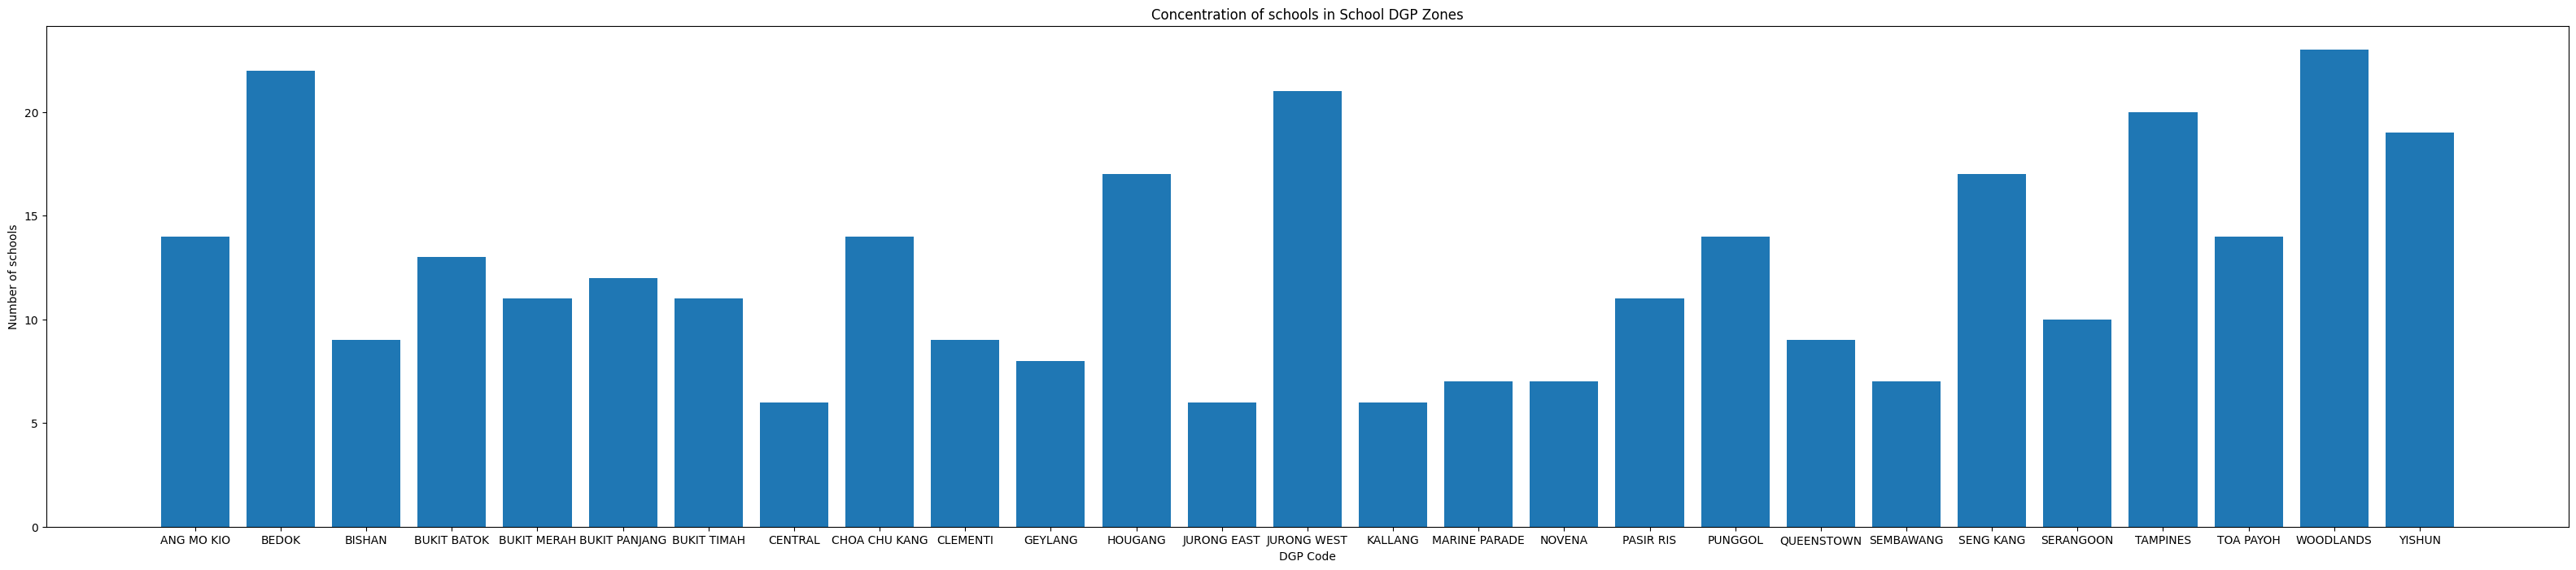

In [ ]:
import matplotlib.pyplot as plt

# Filter out the 'Total' row
df_filtered = df_grouped[df_grouped['dgp_code'] != 'Total']

# Extract the DGP codes and total schools
dgp_codes = df_filtered['dgp_code'].tolist()
total_schools = df_filtered['Total Schools'].tolist()

plt.figure(figsize=(40, 8))  # Adjust the figure size

# Create a bar chart
plt.bar(dgp_codes, total_schools)

# Add labels and title
plt.xlabel('DGP Code')
plt.ylabel('Number of schools')
plt.title('Concentration of schools in School DGP Zones')

# Display the plot
plt.show()


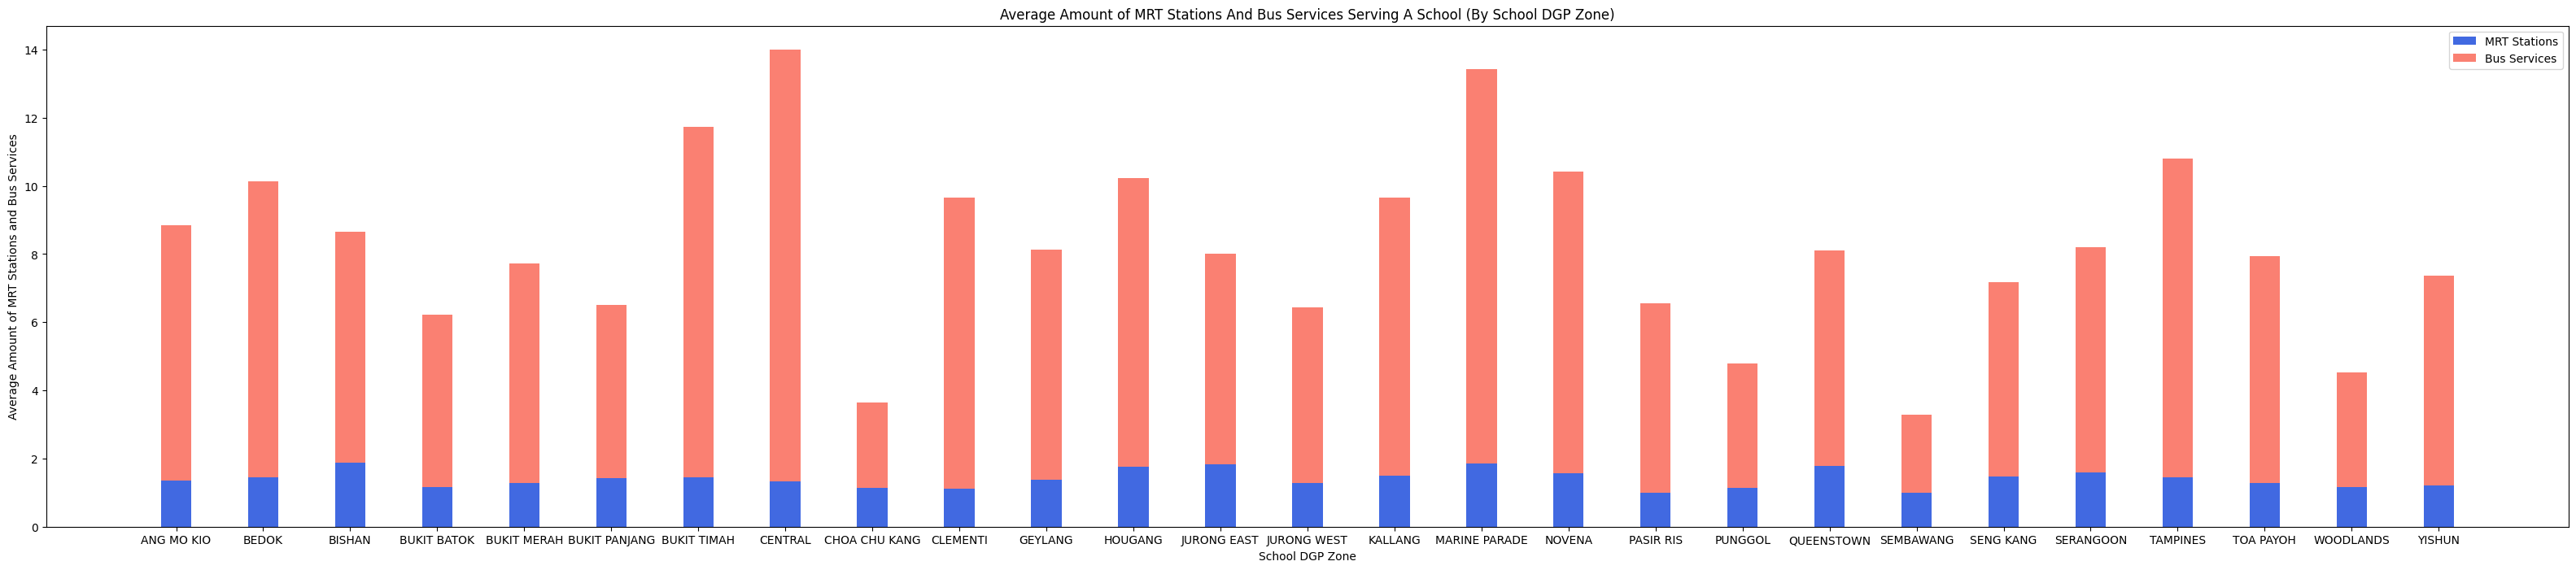

In [ ]:
# Plotting
x = range(len(dgps))
bar_width = 0.35

plt.figure(figsize=(40, 8))  # Adjust the figure size

plt.bar(x, mrt_average, width=bar_width, label='MRT Stations', color='royalblue')
plt.bar(x, bus_average, width=bar_width, label='Bus Services', color='salmon', bottom=mrt_average)

plt.xlabel('School DGP Zone')
plt.ylabel('Average Amount of MRT Stations and Bus Services')
plt.title('Average Amount of MRT Stations And Bus Services Serving A School (By School DGP Zone)')
plt.xticks(x, dgps)
plt.legend()

plt.show()